<a id='top'></a>

# M3-W5 Project: Make your Data shine!
--------
##  Assignment Steps:

Step 1: In this module project your task is to pick a dataset from the link below <br>
Step 2: Load it to Python using an appropriate library (pandas, sqllite3, etc.) <br>
Step 3: Understand the issues (take a look at the issues section for each dataset on the given URL)  <br>
Step 4: Clean the data (take care of outliers, missing values, data types, etc.) and provide explanations for all steps you took while cleaning the data  <br>
Step 5: Explore and visualize your data <br>


Overarching: Submit your work as a Jupyter Notebook with all the code and narrative. 

Note: [Summary](#sum)
__________

In [15]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import pandas_profiling

# Optional packages:
# import fuzzywuzzy
# import requests
# from bs4 import BeautifulSoup
# from datetime import datetime as dt

## Step 1: Pick a dataset
Preliminary pick: The Database of The Metropolitan Museum of Art Open Access with the file "MetObjects.csv"
____________

## Step 2: Load the database to Python using an appropriate library (pandas, sqllite3, etc.)
Since we are handling a csv-file we will import via csv-package
____________

In [8]:
file = "MetObjects.csv"
df = pd.read_csv(file, encoding='utf-8') # , na_values="Not Stated"
#df.head()
df.info()

C:\Users\Moritz Schreckenberg\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,7,10,11,12,13,14,22,34,35,36,37,38,39,40,41,42,43,44,46) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474169 entries, 0 to 474168
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Object Number            474169 non-null  object 
 1   Is Highlight             474169 non-null  bool   
 2   Is Timeline Work         474169 non-null  bool   
 3   Is Public Domain         474169 non-null  bool   
 4   Object ID                474169 non-null  int64  
 5   Gallery Number           54984 non-null   object 
 6   Department               474169 non-null  object 
 7   AccessionYear            469612 non-null  object 
 8   Object Name              472664 non-null  object 
 9   Title                    444568 non-null  object 
 10  Culture                  206594 non-null  object 
 11  Period                   90413 non-null   object 
 12  Dynasty                  23144 non-null   object 
 13  Reign                    11179 non-null   object 
 14  Port

<AxesSubplot:ylabel='Object Number'>

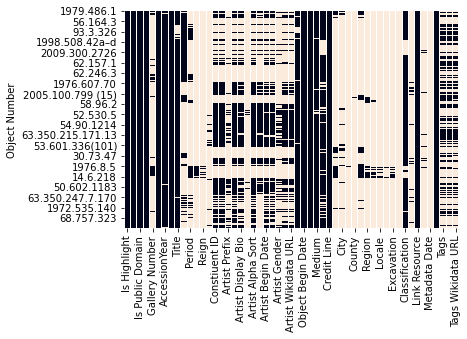

In [9]:
#### Overview of missing data in a heatmap with seaborn - cool stuff ;-)
combined_updated = df.set_index('Object Number')
sns.heatmap(combined_updated.isnull(), cbar=False)

In [10]:
df.head()

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,1979.486.1,False,False,False,1,NaN,The American Wing,1979,Coin,One-dollar Liberty Head Coin,...,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980,Coin,Ten-dollar Liberty Head Coin,...,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
2,67.265.9,False,False,False,3,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
3,67.265.10,False,False,False,4,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
4,67.265.11,False,False,False,5,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


In [13]:
!pip install pandas-profiling

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27091 sha256=5a73b2ce2d3719eba860e82846042962520b63be53d29007e7c079125adeaae4
  Stored in directory: c:\users\moritz schreckenberg\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
  Created wheel for phik: filename=phik-0.11.0-py3-none-any.whl size=599743 sha256=784e35b1fd57424e28150eff130c83c215c10ec9c616bd266e6c9f96754fee83
  Stored in directory: c:\users\moritz schreckenberg\appdata\local\pip\cache\wheels\15\cd\d8\d1a2da5bf20e6411649edb390d93887820168898a3659fd48d
Successfully built htmlmin phik


In [18]:
# pandas_profiling.ProfileReport(df)

In [17]:
df.isnull().mean()

Object Number              0.000000
Is Highlight               0.000000
Is Timeline Work           0.000000
Is Public Domain           0.000000
Object ID                  0.000000
Gallery Number             0.884041
Department                 0.000000
AccessionYear              0.009610
Object Name                0.003174
Title                      0.062427
Culture                    0.564303
Period                     0.809323
Dynasty                    0.951190
Reign                      0.976424
Portfolio                  0.950524
Constiuent ID              0.425616
Artist Role                0.430032
Artist Prefix              0.811409
Artist Display Name        0.425616
Artist Display Bio         0.507355
Artist Suffix              0.974832
Artist Alpha Sort          0.425690
Artist Nationality         0.615365
Artist Begin Date          0.502169
Artist End Date            0.502137
Artist Gender              0.786283
Artist ULAN URL            0.552065
Artist Wikidata URL        0

In [ ]:
df.isnull().sum().sum()